In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
train_identity = pd.read_csv("train_identity.csv")
train_transaction = pd.read_csv("train_transaction.csv")
print(train_identity.shape, train_transaction.shape)

(144233, 41) (590540, 394)


In [3]:
#train_transaction = train_transaction.sample(frac=0.1).reset_index(drop=True)
#print(train_identity.shape, train_transaction.shape)

(144233, 41) (59054, 394)


In [4]:
train = pd.merge(train_transaction, train_identity, on="TransactionID", how="left")
del train_identity, train_transaction

In [5]:
print(f"Train dataset has {train.shape[0]} rows and {train.shape[1]} columns")

Train dataset has 59054 rows and 434 columns


In [6]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3536963,0,14516438,92.220,C,3154,408.0,185.0,mastercard,224.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,AX821 Build/MRA58K
1,3489061,0,13159328,255.970,W,9500,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3130526,0,2944238,38.595,C,15315,202.0,185.0,mastercard,137.0,...,chrome 63.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
3,3109740,0,2409673,50.000,R,6423,554.0,150.0,mastercard,102.0,...,ie 11.0 for desktop,NaN,NaN,NaN,F,F,F,T,desktop,rv:11.0
4,3556925,0,15116128,50.000,H,10486,514.0,150.0,mastercard,219.0,...,chrome 66.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows


In [7]:
train[train["isFraud"]==1].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
14,3342668,1,8802766,7.055,C,4461,375.0,185.0,mastercard,224.0,...,mobile safari generic,NaN,NaN,NaN,F,F,F,F,mobile,NaN
26,3105953,1,2321325,117.000,W,10186,417.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,3282578,1,7312657,60.000,S,2616,327.0,150.0,discover,223.0,...,safari generic,24.0,1920x1080,match_status:2,T,F,T,T,desktop,MacOS
72,3440488,1,11580052,226.000,W,6951,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,3104792,1,2305533,581.000,W,17635,565.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,58149.000000,58889.000000,58601.00000,52476.000000,52476.000000,...,14025.000000,4549.000000,14019.000000,14011.000000,531.000000,534.000000,500.000000,529.000000,534.000000,7848.000000
mean,3.281386e+06,0.034426,7.348976e+06,134.933335,9905.653927,362.751604,153.190630,199.14039,290.645228,86.817250,...,189.246988,14.228622,351.035666,404.004354,367.538606,15.277154,12.614000,317.788280,147.977528,26.534149
std,1.705647e+05,0.182323,4.616856e+06,265.558978,4902.926616,157.361724,11.290017,41.37301,101.664266,2.537327,...,30.436638,1.604073,140.461578,151.489817,199.731253,5.630422,2.341788,89.674646,30.756373,3.759036
min,2.987020e+06,0.000000,8.676100e+04,0.292000,1004.000000,100.000000,100.000000,100.00000,100.000000,16.000000,...,100.000000,11.000000,100.000000,100.000000,106.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,3.133183e+06,0.000000,3.009008e+06,42.950000,6019.000000,215.000000,150.000000,166.00000,204.000000,87.000000,...,166.000000,13.000000,266.000000,266.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.281737e+06,0.000000,7.269574e+06,68.430000,9706.500000,361.000000,150.000000,226.00000,299.000000,87.000000,...,166.000000,15.000000,337.000000,472.000000,252.000000,14.000000,11.000000,321.000000,155.500000,24.000000
75%,3.429874e+06,0.000000,1.124487e+07,119.194500,14182.000000,512.000000,150.000000,226.00000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,459.000000,14.000000,15.000000,321.000000,169.000000,32.000000
max,3.577534e+06,1.000000,1.581103e+07,31937.391000,18395.000000,600.000000,229.000000,237.00000,536.000000,102.000000,...,228.000000,29.000000,671.000000,660.000000,854.000000,41.000000,25.000000,548.000000,216.000000,32.000000


In [9]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 382 columns in train dataset with missing values.


In [10]:
train.isnull().sum()

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
                  ...  
id_36             44867
id_37             44867
id_38             44867
DeviceType        44885
DeviceInfo        47149
Length: 434, dtype: int64

In [11]:
train['id_03'].value_counts(dropna=False, normalize=True).head()

NaN    0.887019
0.0    0.109137
1.0    0.001219
3.0    0.001101
2.0    0.000711
Name: id_03, dtype: float64

C:\Users\80211447\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\80211447\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


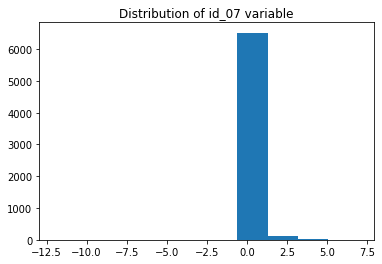

In [12]:
import matplotlib.pyplot as plt
plt.hist(train['id_03']);
plt.title('Distribution of id_07 variable');

## Lets get the test dataset

In [13]:
test_identity = pd.read_csv("test_identity.csv")
test_transaction = pd.read_csv("test_transaction.csv")
print(test_identity.shape, test_transaction.shape)

(141907, 41) (506691, 393)


In [14]:
#test_transaction = test_transaction.sample(frac=0.1).reset_index(drop=True)
#print(test_identity.shape, test_transaction.shape)

(141907, 41) (50669, 393)


In [15]:
test = pd.merge(test_transaction, test_identity, on="TransactionID", how="left")
del test_identity, test_transaction
print(f"Test dataset has {test.shape[0]} rows and {test.shape[1]} columns")

Test dataset has 50669 rows and 433 columns


In [16]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]

In [17]:
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
print(many_null_cols)
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

['dist2', 'D7', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']


In [18]:
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [19]:
cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test + one_value_cols+ one_value_cols_test))
cols_to_drop.remove('isFraud')
len(cols_to_drop)

85

In [20]:
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)

In [21]:
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_30,id_31,id_32,id_33,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3536963,0,14516438,92.220,C,3154,408.0,185.0,mastercard,224.0,...,NaN,chrome 66.0 for android,NaN,NaN,F,F,T,F,mobile,AX821 Build/MRA58K
1,3489061,0,13159328,255.970,W,9500,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3130526,0,2944238,38.595,C,15315,202.0,185.0,mastercard,137.0,...,NaN,chrome 63.0,NaN,NaN,F,F,T,T,desktop,NaN
3,3109740,0,2409673,50.000,R,6423,554.0,150.0,mastercard,102.0,...,NaN,ie 11.0 for desktop,NaN,NaN,F,F,F,T,desktop,rv:11.0
4,3556925,0,15116128,50.000,H,10486,514.0,150.0,mastercard,219.0,...,Windows 10,chrome 66.0,24.0,1920x1080,T,F,T,T,desktop,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,3137786,0,3104196,39.000,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59050,3403156,0,10516779,105.950,W,2884,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59051,2993507,0,225534,150.000,W,3605,514.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59052,3504005,0,13546322,57.950,W,10112,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
train["ProductCD"].dtype.name

'object'

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59054 entries, 0 to 59053
Columns: 349 entries, TransactionID to DeviceInfo
dtypes: float64(318), int64(4), object(27)
memory usage: 157.7+ MB


In [24]:
train["card3"].dtypes == np.object

False

In [25]:
target = 'isFraud'
indexCol = 'TransactionID'

In [26]:
y = train[target]

In [27]:
for c in tqdm(train.columns):
    if c != target:
        if train[c].dtypes == np.object:
            train[c].fillna('', inplace=True)

100%|██████████████████████████████████████| 349/349 [00:00<00:00, 1501.05it/s]


In [28]:
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_30,id_31,id_32,id_33,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3536963,0,14516438,92.220,C,3154,408.0,185.0,mastercard,224.0,...,,chrome 66.0 for android,NaN,,F,F,T,F,mobile,AX821 Build/MRA58K
1,3489061,0,13159328,255.970,W,9500,321.0,150.0,visa,226.0,...,,,NaN,,,,,,,
2,3130526,0,2944238,38.595,C,15315,202.0,185.0,mastercard,137.0,...,,chrome 63.0,NaN,,F,F,T,T,desktop,
3,3109740,0,2409673,50.000,R,6423,554.0,150.0,mastercard,102.0,...,,ie 11.0 for desktop,NaN,,F,F,F,T,desktop,rv:11.0
4,3556925,0,15116128,50.000,H,10486,514.0,150.0,mastercard,219.0,...,Windows 10,chrome 66.0,24.0,1920x1080,T,F,T,T,desktop,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,3137786,0,3104196,39.000,W,6550,NaN,150.0,visa,226.0,...,,,NaN,,,,,,,
59050,3403156,0,10516779,105.950,W,2884,490.0,150.0,visa,226.0,...,,,NaN,,,,,,,
59051,2993507,0,225534,150.000,W,3605,514.0,150.0,mastercard,224.0,...,,,NaN,,,,,,,
59052,3504005,0,13546322,57.950,W,10112,360.0,150.0,visa,166.0,...,,,NaN,,,,,,,


In [29]:
def convertToType(dfCol, npType): # Convert to numpy type
    dfCol = dfCol.astype(npType)

def convertToFloat32(df): # Convert numeric data to float32 or int32
    for col in tqdm(df.columns):
        if df[col].dtypes != np.object and df[col].dtypes != np.int32:
            convertToType(df[col], np.float32)
    return df
            
def fillCatNan(df, filler): # Fill missing string values
    for col in tqdm(df.columns):
        if df[col].dtypes == np.object:
            df[col].fillna(filler, inplace=True)
    return df
            
def fillValNan(df, filler): # Fill missing numeric values
    for col in tqdm(df.columns):
        if df[col].dtypes != np.object:
            df[col].fillna(0.0, inplace=True)
    return df
            
def scaleVals(df, target): # Scale values
    for col in tqdm(df.columns):
        if col != target and col != indexCol and df[col].dtypes != np.object:
            scaler = RobustScaler().fit(df[col].values.reshape(-1, 1))
            df[col] = scaler.transform(df[col].values.reshape(-1, 1))
    return df

In [30]:
train = convertToFloat32(train)
train = fillCatNan(train ,'<empty>')
train = fillValNan(train , 0.0)
train = scaleVals(train, target)

100%|███████████████████████████████████████| 349/349 [00:00<00:00, 515.12it/s]


In [31]:
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_30,id_31,id_32,id_33,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3536963,0,0.879916,0.312023,C,-0.802707,0.156863,35.0,mastercard,-0.033333,...,,chrome 66.0 for android,0.0,,F,F,T,F,mobile,AX821 Build/MRA58K
1,3489061,0,0.715135,2.459718,W,-0.025297,-0.127451,0.0,visa,0.000000,...,,,0.0,,,,,,,
2,3130526,0,-0.525183,-0.391307,C,0.687064,-0.516340,35.0,mastercard,-1.483333,...,,chrome 63.0,0.0,,F,F,T,T,desktop,
3,3109740,0,-0.590090,-0.241722,R,-0.402242,0.633987,0.0,mastercard,-2.066667,...,,ie 11.0 for desktop,0.0,,F,F,F,T,desktop,rv:11.0
4,3556925,0,0.952730,-0.241722,H,0.095492,0.503268,0.0,mastercard,-0.116667,...,Windows 10,chrome 66.0,24.0,1920x1080,T,F,T,T,desktop,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,3137786,0,-0.505761,-0.385995,W,-0.386684,-1.176471,0.0,visa,0.000000,...,,,0.0,,,,,,,
59050,3403156,0,0.394276,0.492101,W,-0.835783,0.424837,0.0,visa,0.000000,...,,,0.0,,,,,,,
59051,2993507,0,-0.855289,1.069848,W,-0.747458,0.503268,0.0,mastercard,-0.033333,...,,,0.0,,,,,,,
59052,3504005,0,0.762124,-0.137453,W,0.049675,0.000000,0.0,visa,-1.000000,...,,,0.0,,,,,,,


## PCA Visualization

In [41]:
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [33]:
## Index of Categorical columns
cat_features_indices = np.where(train.dtypes == np.object)[0]
cat_features_indices

array([  4,   8,  10,  14,  15,  43,  44,  45,  46,  47,  48,  49,  50,
       329, 332, 333, 337, 338, 339, 340, 342, 343, 344, 345, 346, 347,
       348], dtype=int64)

In [34]:
train_pca = train.drop(train.columns[cat_features_indices], axis=1)
train_pca

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_06,id_09,id_10,id_11,id_13,id_14,id_17,id_19,id_20,id_32
0,3536963,0,0.879916,0.312023,-0.802707,0.156863,35.0,-0.033333,-1.902098,-87.0,...,-28.0,0.0,0.0,100.000000,64.0,0.0,225.0,384.0,122.0,0.0
1,3489061,0,0.715135,2.459718,-0.025297,-0.127451,0.0,0.000000,0.405594,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3130526,0,-0.525183,-0.391307,0.687064,-0.516340,35.0,-1.483333,-1.902098,-87.0,...,-18.0,0.0,0.0,100.000000,52.0,0.0,225.0,254.0,507.0,0.0
3,3109740,0,-0.590090,-0.241722,-0.402242,0.633987,0.0,-2.066667,0.405594,0.0,...,-5.0,0.0,0.0,95.160004,63.0,0.0,166.0,216.0,214.0,0.0
4,3556925,0,0.952730,-0.241722,0.095492,0.503268,0.0,-0.116667,0.188811,0.0,...,0.0,0.0,0.0,100.000000,52.0,-480.0,166.0,277.0,222.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,3137786,0,-0.505761,-0.385995,-0.386684,-1.176471,0.0,0.000000,-0.055944,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59050,3403156,0,0.394276,0.492101,-0.835783,0.424837,0.0,0.000000,-0.055944,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59051,2993507,0,-0.855289,1.069848,-0.747458,0.503268,0.0,-0.033333,0.370629,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59052,3504005,0,0.762124,-0.137453,0.049675,0.000000,0.0,-1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
pca=PCA(n_components=3) 
pca.fit(train_pca)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
X_pca=pca.transform(train_pca) 
print ("shape of X_pca", X_pca.shape)

shape of X_pca (59054, 3)


In [37]:
X_pca

array([[-2.44764238e+05,  2.35981098e+05,  9.50162403e+01],
       [-2.09404674e+05, -3.14049909e+04,  6.85449423e+03],
       [ 1.57960139e+05,  1.61730697e+05, -2.14105251e+04],
       ...,
       [ 2.84729229e+05, -5.55605954e+04, -2.17518071e+04],
       [-2.24305849e+05, -3.06765513e+04,  7.71714910e+03],
       [-2.28236376e+05,  2.36589375e+05, -9.08620652e+02]])

In [43]:
color_list = []
for x in y.values:
    if x == 1:
        color_list.append("red")
    else:
        color_list.append("blue")  

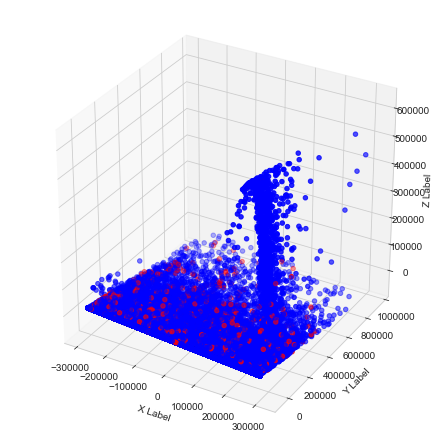

In [44]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=color_list, marker='o', cmap='viridis')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Time to train the model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

In [43]:
from catboost import CatBoostClassifier

In [45]:
model = CatBoostClassifier(random_state=0)
model.fit(X_train, y_train, cat_features=cat_features_indices)

Learning rate set to 0.049884
0:	learn: 0.4825418	total: 811ms	remaining: 13m 29s
1:	learn: 0.3270063	total: 1.46s	remaining: 12m 7s
2:	learn: 0.2246646	total: 2.1s	remaining: 11m 37s
3:	learn: 0.1547822	total: 2.69s	remaining: 11m 8s
4:	learn: 0.1058404	total: 3.2s	remaining: 10m 36s
5:	learn: 0.0730214	total: 3.87s	remaining: 10m 41s
6:	learn: 0.0504836	total: 4.65s	remaining: 10m 59s
7:	learn: 0.0357011	total: 5.32s	remaining: 10m 59s
8:	learn: 0.0257014	total: 6.19s	remaining: 11m 22s
9:	learn: 0.0187295	total: 7.02s	remaining: 11m 34s
10:	learn: 0.0137226	total: 7.81s	remaining: 11m 42s
11:	learn: 0.0102766	total: 8.58s	remaining: 11m 46s
12:	learn: 0.0077579	total: 9.52s	remaining: 12m 2s
13:	learn: 0.0059269	total: 10.3s	remaining: 12m 2s
14:	learn: 0.0045855	total: 10.7s	remaining: 11m 45s
15:	learn: 0.0035747	total: 11.3s	remaining: 11m 34s
16:	learn: 0.0028194	total: 12s	remaining: 11m 32s
17:	learn: 0.0022459	total: 12.6s	remaining: 11m 27s
18:	learn: 0.0018138	total: 13.4s	

154:	learn: 0.0000047	total: 1m 54s	remaining: 10m 21s
155:	learn: 0.0000047	total: 1m 54s	remaining: 10m 20s
156:	learn: 0.0000046	total: 1m 55s	remaining: 10m 20s
157:	learn: 0.0000046	total: 1m 56s	remaining: 10m 18s
158:	learn: 0.0000046	total: 1m 57s	remaining: 10m 24s
159:	learn: 0.0000045	total: 2m	remaining: 10m 31s
160:	learn: 0.0000045	total: 2m 1s	remaining: 10m 33s
161:	learn: 0.0000045	total: 2m 2s	remaining: 10m 32s
162:	learn: 0.0000044	total: 2m 2s	remaining: 10m 29s
163:	learn: 0.0000044	total: 2m 2s	remaining: 10m 26s
164:	learn: 0.0000043	total: 2m 3s	remaining: 10m 25s
165:	learn: 0.0000043	total: 2m 3s	remaining: 10m 22s
166:	learn: 0.0000042	total: 2m 4s	remaining: 10m 21s
167:	learn: 0.0000042	total: 2m 5s	remaining: 10m 20s
168:	learn: 0.0000042	total: 2m 5s	remaining: 10m 18s
169:	learn: 0.0000042	total: 2m 6s	remaining: 10m 17s
170:	learn: 0.0000041	total: 2m 7s	remaining: 10m 16s
171:	learn: 0.0000041	total: 2m 7s	remaining: 10m 15s
172:	learn: 0.0000041	tota

307:	learn: 0.0000020	total: 4m 2s	remaining: 9m 5s
308:	learn: 0.0000020	total: 4m 3s	remaining: 9m 4s
309:	learn: 0.0000020	total: 4m 4s	remaining: 9m 3s
310:	learn: 0.0000020	total: 4m 4s	remaining: 9m 2s
311:	learn: 0.0000020	total: 4m 5s	remaining: 9m 1s
312:	learn: 0.0000020	total: 4m 5s	remaining: 8m 59s
313:	learn: 0.0000020	total: 4m 6s	remaining: 8m 59s
314:	learn: 0.0000019	total: 4m 7s	remaining: 8m 57s
315:	learn: 0.0000019	total: 4m 9s	remaining: 9m
316:	learn: 0.0000019	total: 4m 11s	remaining: 9m 2s
317:	learn: 0.0000019	total: 4m 12s	remaining: 9m 2s
318:	learn: 0.0000019	total: 4m 13s	remaining: 9m
319:	learn: 0.0000019	total: 4m 13s	remaining: 8m 59s
320:	learn: 0.0000019	total: 4m 14s	remaining: 8m 58s
321:	learn: 0.0000019	total: 4m 15s	remaining: 8m 57s
322:	learn: 0.0000019	total: 4m 15s	remaining: 8m 56s
323:	learn: 0.0000019	total: 4m 16s	remaining: 8m 55s
324:	learn: 0.0000019	total: 4m 17s	remaining: 8m 53s
325:	learn: 0.0000019	total: 4m 17s	remaining: 8m 52

461:	learn: 0.0000014	total: 6m 33s	remaining: 7m 37s
462:	learn: 0.0000014	total: 6m 33s	remaining: 7m 36s
463:	learn: 0.0000014	total: 6m 34s	remaining: 7m 35s
464:	learn: 0.0000014	total: 6m 35s	remaining: 7m 34s
465:	learn: 0.0000014	total: 6m 35s	remaining: 7m 33s
466:	learn: 0.0000014	total: 6m 36s	remaining: 7m 32s
467:	learn: 0.0000014	total: 6m 36s	remaining: 7m 31s
468:	learn: 0.0000013	total: 6m 37s	remaining: 7m 30s
469:	learn: 0.0000013	total: 6m 38s	remaining: 7m 29s
470:	learn: 0.0000013	total: 6m 40s	remaining: 7m 30s
471:	learn: 0.0000013	total: 6m 43s	remaining: 7m 30s
472:	learn: 0.0000013	total: 6m 44s	remaining: 7m 30s
473:	learn: 0.0000013	total: 6m 45s	remaining: 7m 29s
474:	learn: 0.0000013	total: 6m 45s	remaining: 7m 28s
475:	learn: 0.0000013	total: 6m 46s	remaining: 7m 27s
476:	learn: 0.0000013	total: 6m 46s	remaining: 7m 26s
477:	learn: 0.0000013	total: 6m 47s	remaining: 7m 25s
478:	learn: 0.0000013	total: 6m 48s	remaining: 7m 23s
479:	learn: 0.0000013	total:

614:	learn: 0.0000011	total: 9m 27s	remaining: 5m 55s
615:	learn: 0.0000011	total: 9m 28s	remaining: 5m 54s
616:	learn: 0.0000011	total: 9m 28s	remaining: 5m 53s
617:	learn: 0.0000011	total: 9m 29s	remaining: 5m 51s
618:	learn: 0.0000011	total: 9m 30s	remaining: 5m 50s
619:	learn: 0.0000011	total: 9m 30s	remaining: 5m 49s
620:	learn: 0.0000011	total: 9m 33s	remaining: 5m 49s
621:	learn: 0.0000011	total: 9m 36s	remaining: 5m 50s
622:	learn: 0.0000011	total: 9m 37s	remaining: 5m 49s
623:	learn: 0.0000011	total: 9m 38s	remaining: 5m 48s
624:	learn: 0.0000011	total: 9m 39s	remaining: 5m 47s
625:	learn: 0.0000011	total: 9m 39s	remaining: 5m 46s
626:	learn: 0.0000011	total: 9m 40s	remaining: 5m 45s
627:	learn: 0.0000011	total: 9m 41s	remaining: 5m 44s
628:	learn: 0.0000011	total: 9m 42s	remaining: 5m 43s
629:	learn: 0.0000011	total: 9m 42s	remaining: 5m 42s
630:	learn: 0.0000011	total: 9m 44s	remaining: 5m 41s
631:	learn: 0.0000011	total: 9m 47s	remaining: 5m 41s
632:	learn: 0.0000011	total:

765:	learn: 0.0000010	total: 12m 13s	remaining: 3m 44s
766:	learn: 0.0000010	total: 12m 14s	remaining: 3m 43s
767:	learn: 0.0000010	total: 12m 15s	remaining: 3m 42s
768:	learn: 0.0000010	total: 12m 15s	remaining: 3m 41s
769:	learn: 0.0000010	total: 12m 16s	remaining: 3m 40s
770:	learn: 0.0000010	total: 12m 17s	remaining: 3m 39s
771:	learn: 0.0000010	total: 12m 18s	remaining: 3m 38s
772:	learn: 0.0000010	total: 12m 21s	remaining: 3m 37s
773:	learn: 0.0000010	total: 12m 23s	remaining: 3m 37s
774:	learn: 0.0000010	total: 12m 24s	remaining: 3m 36s
775:	learn: 0.0000010	total: 12m 25s	remaining: 3m 35s
776:	learn: 0.0000010	total: 12m 26s	remaining: 3m 34s
777:	learn: 0.0000010	total: 12m 26s	remaining: 3m 33s
778:	learn: 0.0000010	total: 12m 27s	remaining: 3m 32s
779:	learn: 0.0000010	total: 12m 28s	remaining: 3m 31s
780:	learn: 0.0000010	total: 12m 28s	remaining: 3m 29s
781:	learn: 0.0000010	total: 12m 29s	remaining: 3m 28s
782:	learn: 0.0000010	total: 12m 30s	remaining: 3m 28s
783:	learn

915:	learn: 0.0000010	total: 14m 51s	remaining: 1m 21s
916:	learn: 0.0000010	total: 14m 51s	remaining: 1m 20s
917:	learn: 0.0000010	total: 14m 52s	remaining: 1m 19s
918:	learn: 0.0000010	total: 14m 53s	remaining: 1m 18s
919:	learn: 0.0000010	total: 14m 53s	remaining: 1m 17s
920:	learn: 0.0000010	total: 14m 54s	remaining: 1m 16s
921:	learn: 0.0000010	total: 14m 56s	remaining: 1m 15s
922:	learn: 0.0000010	total: 14m 59s	remaining: 1m 15s
923:	learn: 0.0000010	total: 15m	remaining: 1m 14s
924:	learn: 0.0000010	total: 15m	remaining: 1m 13s
925:	learn: 0.0000010	total: 15m 1s	remaining: 1m 12s
926:	learn: 0.0000010	total: 15m 2s	remaining: 1m 11s
927:	learn: 0.0000010	total: 15m 2s	remaining: 1m 10s
928:	learn: 0.0000010	total: 15m 3s	remaining: 1m 9s
929:	learn: 0.0000010	total: 15m 4s	remaining: 1m 8s
930:	learn: 0.0000010	total: 15m 4s	remaining: 1m 7s
931:	learn: 0.0000010	total: 15m 6s	remaining: 1m 6s
932:	learn: 0.0000010	total: 15m 8s	remaining: 1m 5s
933:	learn: 0.0000010	total: 15

In [ ]:
print('Done. Score:', model.score(X_test, y_test) * 100.0)